In [1]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

In [2]:
api_key = ####################### 

In [3]:
channel_ids = ['UC4bq21IPPbpu0Qrsl7LW0sw']

In [4]:
api_service_name = "youtube"
api_version = "v3"
    

    # Get credentials and create an API client
    
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [5]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []
    
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id= ','.join(channel_ids)
    )
    response = request.execute()
    
    #loop through the items
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'Views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']             
        }
        
        all_data.append(data)
        
    return(pd.DataFrame(all_data))

In [6]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [7]:
channel_stats

channelName subscribers     Views totalVideos                playlistId
0   Slidebean      454000  31495918         310  UU4bq21IPPbpu0Qrsl7LW0sw

In [8]:
playlist_id = 'UU4bq21IPPbpu0Qrsl7LW0sw'

def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(
        part="snippet, contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        
        request = youtube.playlistItems().list(
            part="snippet, contentDetails",
            playlistId=playlist_id,
            maxResults = 50,
            pageToken = next_page_token
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        
        next_page_token = response.get('nextPageToken')
        
    return video_ids

In [9]:
video_ids = get_video_ids(youtube, playlist_id)

In [10]:
len(video_ids)

308

In [11]:
def get_video_details(youtube, video_ids):

    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet, contentDetails, statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            stats_to_keep ={'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                            'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                            'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)

    

In [12]:
video_df = get_video_details(youtube, video_ids)
video_df

video_id channelTitle  \
0    uKBQ1mhLfoo    Slidebean   
1    RIv6RyF3Ets    Slidebean   
2    sk7KoCgNNeg    Slidebean   
3    _6TxE_7m7cw    Slidebean   
4    yZH5_r5mFZM    Slidebean   
..           ...          ...   
303  -U_HN7H8n8E    Slidebean   
304  SB16xgtFmco    Slidebean   
305  iB1GmC_RXOI    Slidebean   
306  oGue4ltaKk4    Slidebean   
307  yCaVlOJ_Woc    Slidebean   

                                                 title  \
0                        How Flying became a NIGHTMARE   
1    Why nobody wants kids anymore (and who gets th...   
2                         ChatGPT has a sense of humor   
3           You're for sale and you don't even know it   
4                     Tom Cruise killed MoviePass Pt.2   
..                                                 ...   
303  Death By PowerPoint: a Crash Course on Slide D...   
304  How to Make a Pitch Deck for Investors in 2023...   
305  Presentation skills and tips from amazing publ...   
306                              So what is Slidebean?   
307       Slidebean Pitch at DreamIt Ventures Demo Day   

                                           description  \
0    Try ChartMogul, The Leading Subscription Analy...   
1    Try Ahrefs and improve your website’s SEO perf...   
2                  #slidebean #startups #chatgpt #gpt4   
3    What does the internet know about you?  ► http...   
4                      #slidebean #startups #moviepass   
..                                                 ...   
303  ► Need help with your presentation deck?: http...   
304  Are you looking to create, or improve, your pi...   
305  What makes a great Public Speaker?\n\nA great ...   
306  - We help you create awesome presentations. Tr...   
307  Slidebean is a simplified presentation tool th...   

                                                  tags           publishedAt  \
0    [slidebean, caya slidebean, company forensics,...  2023-05-30T12:30:22Z   
1    [slidebean, caya slidebean, company forensics,...  2023-05-18T13:00:28Z   
2    [slidebean, caya slidebean, company forensics,...  2023-05-02T16:57:57Z   
3    [slidebean, caya slidebean, company forensics,...  2023-04-28T10:00:19Z   
4    [slidebean, caya slidebean, company forensics,...  2023-04-27T14:19:21Z   
..                                                 ...                   ...   
303  [death by powerpoint, powerpoint, slide design...  2018-09-06T15:30:08Z   
304  [best pitch deck, caya slidebean, creating the...  2018-08-16T14:49:09Z   
305  [presentation skills, public speaking, slidebe...  2018-06-08T22:51:36Z   
306  [Slidebean, What is Slidebean, How to use Slid...  2017-09-07T17:49:45Z   
307  [Slidebean, Presentation Software, Demo Day, D...  2014-08-14T09:28:45Z   

    viewCount likeCount favouriteCount commentCount  duration definition  \
0       15278       709           None          102  PT20M27S         hd   
1       22523      1049           None          280     PT17M         hd   
2        4429       135           None            6      PT1M         hd   
3       28792      1262           None          109  PT22M30S         hd   
4        4222       110           None            5     PT37S         hd   
..        ...       ...            ...          ...       ...        ...   
303     64811       673           None           22   PT5M43S         hd   
304   1093061     28147           None          521  PT12M48S         hd   
305      8213       128           None            3  PT10M52S         hd   
306     77006       150           None           18   PT1M17S         hd   
307     19469       512           None           25   PT7M32S         hd   

    caption  
0     false  
1     false  
2     false  
3     false  
4     false  
..      ...  
303    true  
304    true  
305    true  
306    true  
307   false  

[308 rows x 13 columns]

In [13]:
#Data Pre-processing

video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [14]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [15]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [16]:
#video_df['publishedIn'] = pd.to_datetime(video_df['publishedAt'])
#video_df['publishedIn'].dt.dayofweek()
#video_df['publishedIn'].dt.strftime('%A')
#video_df['publishedIn']

# Extract the publishedAt column from the DataFrame.
publishedAt = video_df['publishedAt']

# Convert the publishedAt column to a datetime object.
publishedAt = pd.to_datetime(publishedAt)

# Use the `dayofweek()` method to get the day of the week from the datetime object.
day_of_week = publishedAt.dt.dayofweek

# Create a new column in the DataFrame to store the day of the week.
video_df['day_of_week'] = day_of_week

In [17]:
video_df.head()

video_id channelTitle  \
0  uKBQ1mhLfoo    Slidebean   
1  RIv6RyF3Ets    Slidebean   
2  sk7KoCgNNeg    Slidebean   
3  _6TxE_7m7cw    Slidebean   
4  yZH5_r5mFZM    Slidebean   

                                               title  \
0                      How Flying became a NIGHTMARE   
1  Why nobody wants kids anymore (and who gets th...   
2                       ChatGPT has a sense of humor   
3         You're for sale and you don't even know it   
4                   Tom Cruise killed MoviePass Pt.2   

                                         description  \
0  Try ChartMogul, The Leading Subscription Analy...   
1  Try Ahrefs and improve your website’s SEO perf...   
2                #slidebean #startups #chatgpt #gpt4   
3  What does the internet know about you?  ► http...   
4                    #slidebean #startups #moviepass   

                                                tags           publishedAt  \
0  [slidebean, caya slidebean, company forensics,...  2023-05-30T12:30:22Z   
1  [slidebean, caya slidebean, company forensics,...  2023-05-18T13:00:28Z   
2  [slidebean, caya slidebean, company forensics,...  2023-05-02T16:57:57Z   
3  [slidebean, caya slidebean, company forensics,...  2023-04-28T10:00:19Z   
4  [slidebean, caya slidebean, company forensics,...  2023-04-27T14:19:21Z   

   viewCount  likeCount favouriteCount  commentCount  duration definition  \
0    15278.0      709.0           None         102.0  PT20M27S         hd   
1    22523.0     1049.0           None         280.0     PT17M         hd   
2     4429.0      135.0           None           6.0      PT1M         hd   
3    28792.0     1262.0           None         109.0  PT22M30S         hd   
4     4222.0      110.0           None           5.0     PT37S         hd   

  caption  day_of_week  
0   false            1  
1   false            3  
2   false            1  
3   false            4  
4   false            3

In [18]:
video_df.head()

video_id channelTitle  \
0  uKBQ1mhLfoo    Slidebean   
1  RIv6RyF3Ets    Slidebean   
2  sk7KoCgNNeg    Slidebean   
3  _6TxE_7m7cw    Slidebean   
4  yZH5_r5mFZM    Slidebean   

                                               title  \
0                      How Flying became a NIGHTMARE   
1  Why nobody wants kids anymore (and who gets th...   
2                       ChatGPT has a sense of humor   
3         You're for sale and you don't even know it   
4                   Tom Cruise killed MoviePass Pt.2   

                                         description  \
0  Try ChartMogul, The Leading Subscription Analy...   
1  Try Ahrefs and improve your website’s SEO perf...   
2                #slidebean #startups #chatgpt #gpt4   
3  What does the internet know about you?  ► http...   
4                    #slidebean #startups #moviepass   

                                                tags           publishedAt  \
0  [slidebean, caya slidebean, company forensics,...  2023-05-30T12:30:22Z   
1  [slidebean, caya slidebean, company forensics,...  2023-05-18T13:00:28Z   
2  [slidebean, caya slidebean, company forensics,...  2023-05-02T16:57:57Z   
3  [slidebean, caya slidebean, company forensics,...  2023-04-28T10:00:19Z   
4  [slidebean, caya slidebean, company forensics,...  2023-04-27T14:19:21Z   

   viewCount  likeCount favouriteCount  commentCount  duration definition  \
0    15278.0      709.0           None         102.0  PT20M27S         hd   
1    22523.0     1049.0           None         280.0     PT17M         hd   
2     4429.0      135.0           None           6.0      PT1M         hd   
3    28792.0     1262.0           None         109.0  PT22M30S         hd   
4     4222.0      110.0           None           5.0     PT37S         hd   

  caption  day_of_week  
0   false            1  
1   false            3  
2   false            1  
3   false            4  
4   false            3

In [19]:
#import pandas as pd

# Load the data into a pandas DataFrame.
#df = pd.read_csv('data.csv')

# Extract the day of the week number column from the DataFrame.
#day_of_week_number = video_df['day_of_week']

# Create a list of day of the week names.
#day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Use the `map()` method to convert the day of the week numbers to day of the week names.
#day_of_week_names_mapped = day_of_week.map(day_of_week_names)

# Create a new column in the DataFrame to store the day of the week names.
#video_df['day_of_week_name'] = day_of_week_names_mapped

# Print the DataFrame.
#print(df)
video_df["dayOfWeek"] = publishedAt.dt.day_name()

In [20]:
video_df.head()

video_id channelTitle  \
0  uKBQ1mhLfoo    Slidebean   
1  RIv6RyF3Ets    Slidebean   
2  sk7KoCgNNeg    Slidebean   
3  _6TxE_7m7cw    Slidebean   
4  yZH5_r5mFZM    Slidebean   

                                               title  \
0                      How Flying became a NIGHTMARE   
1  Why nobody wants kids anymore (and who gets th...   
2                       ChatGPT has a sense of humor   
3         You're for sale and you don't even know it   
4                   Tom Cruise killed MoviePass Pt.2   

                                         description  \
0  Try ChartMogul, The Leading Subscription Analy...   
1  Try Ahrefs and improve your website’s SEO perf...   
2                #slidebean #startups #chatgpt #gpt4   
3  What does the internet know about you?  ► http...   
4                    #slidebean #startups #moviepass   

                                                tags           publishedAt  \
0  [slidebean, caya slidebean, company forensics,...  2023-05-30T12:30:22Z   
1  [slidebean, caya slidebean, company forensics,...  2023-05-18T13:00:28Z   
2  [slidebean, caya slidebean, company forensics,...  2023-05-02T16:57:57Z   
3  [slidebean, caya slidebean, company forensics,...  2023-04-28T10:00:19Z   
4  [slidebean, caya slidebean, company forensics,...  2023-04-27T14:19:21Z   

   viewCount  likeCount favouriteCount  commentCount  duration definition  \
0    15278.0      709.0           None         102.0  PT20M27S         hd   
1    22523.0     1049.0           None         280.0     PT17M         hd   
2     4429.0      135.0           None           6.0      PT1M         hd   
3    28792.0     1262.0           None         109.0  PT22M30S         hd   
4     4222.0      110.0           None           5.0     PT37S         hd   

  caption  day_of_week dayOfWeek  
0   false            1   Tuesday  
1   false            3  Thursday  
2   false            1   Tuesday  
3   false            4    Friday  
4   false            3  Thursday

In [21]:

import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [22]:
video_df[['duration', 'durationSecs']]

duration  durationSecs
0    PT20M27S        1227.0
1       PT17M        1020.0
2        PT1M          60.0
3    PT22M30S        1350.0
4       PT37S          37.0
..        ...           ...
303   PT5M43S         343.0
304  PT12M48S         768.0
305  PT10M52S         652.0
306   PT1M17S          77.0
307   PT7M32S         452.0

[308 rows x 2 columns]

In [23]:
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [24]:
#Omoh!!! Finally to Analysis and Visualization

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

import plotly.express as px

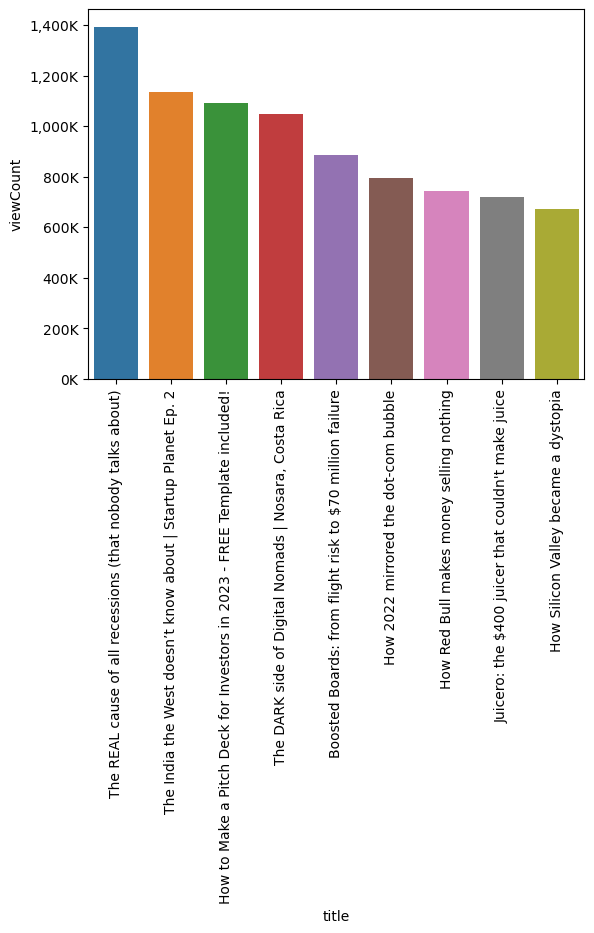

In [25]:

ax = sns.barplot(x = 'title', y='viewCount', data=video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

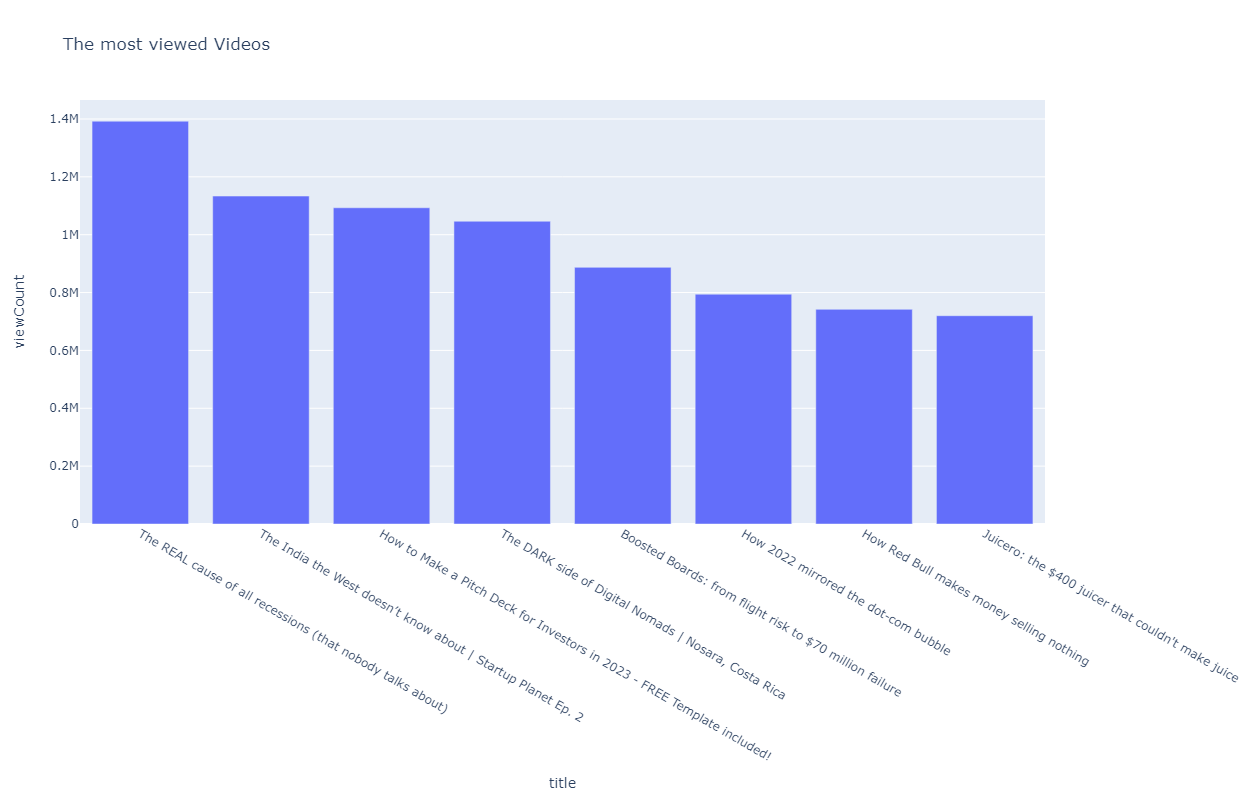

In [26]:
title_view = video_df[['title', 'viewCount']].sort_values('viewCount', ascending=False).head(8)
px.bar(title_view, x= 'title', y='viewCount', width=1000, height=800, title='The most viewed Videos')

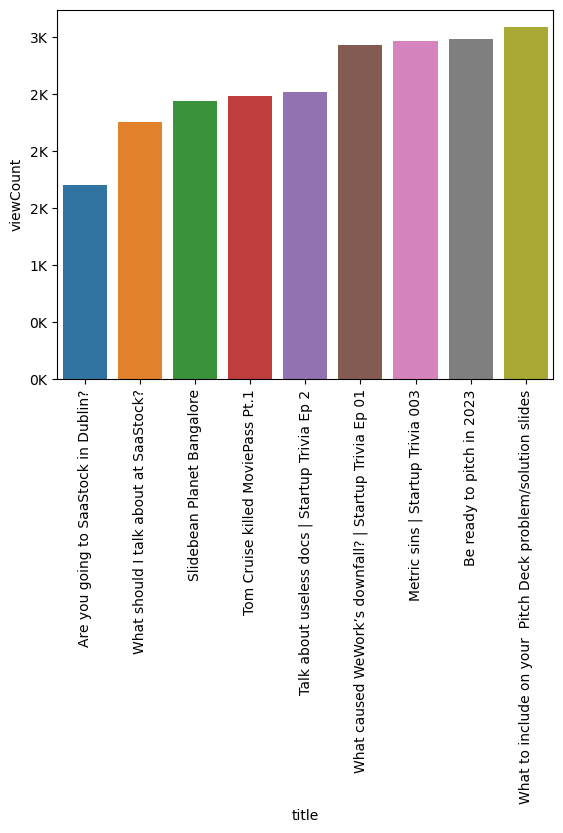

In [27]:
#Worst Performing Videos

ax = sns.barplot(x = 'title', y='viewCount', data=video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

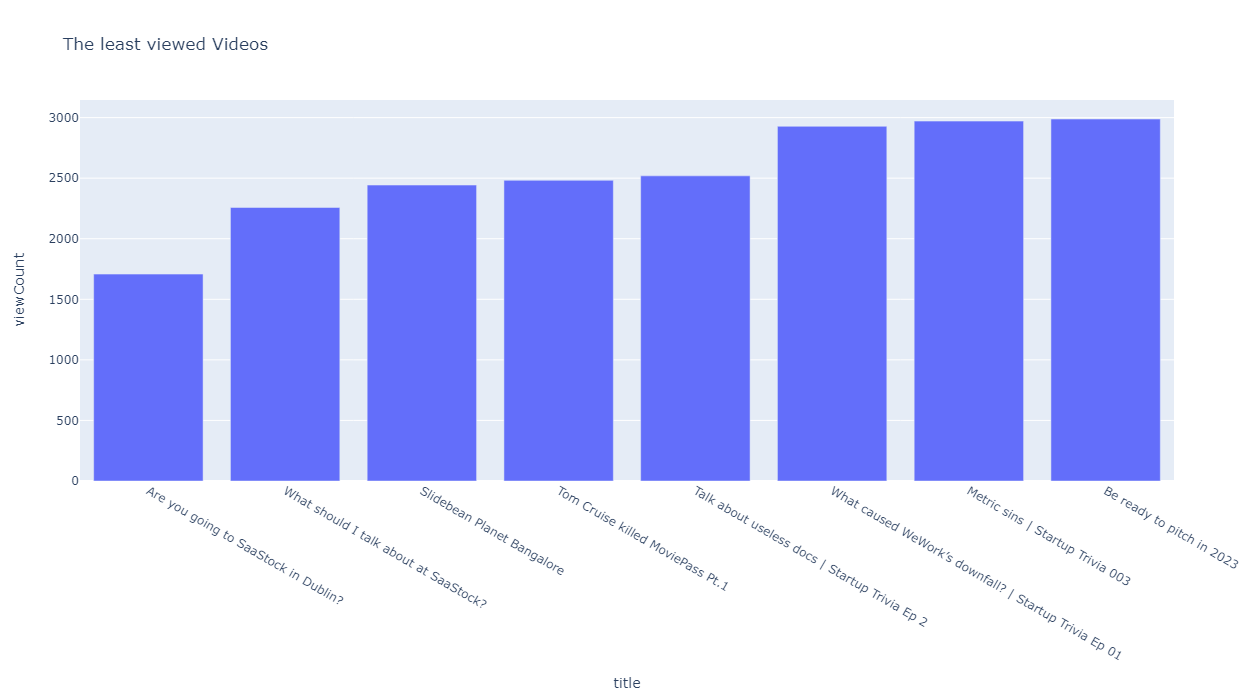

In [28]:
title_view_worst = video_df[['title', 'viewCount']].sort_values('viewCount', ascending=True).head(8)
px.bar(title_view_worst, x= 'title', y='viewCount', width=1000, height=700, title='The least viewed Videos')

C:\Users\Dell\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='channelTitle', ylabel='viewCount'>

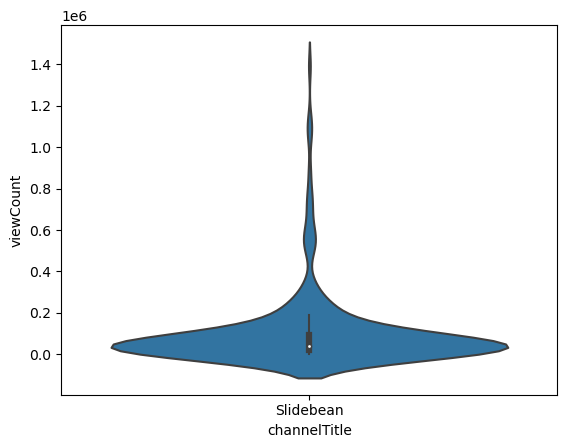

In [29]:
sns.violinplot(video_df['channelTitle'], video_df['viewCount'])

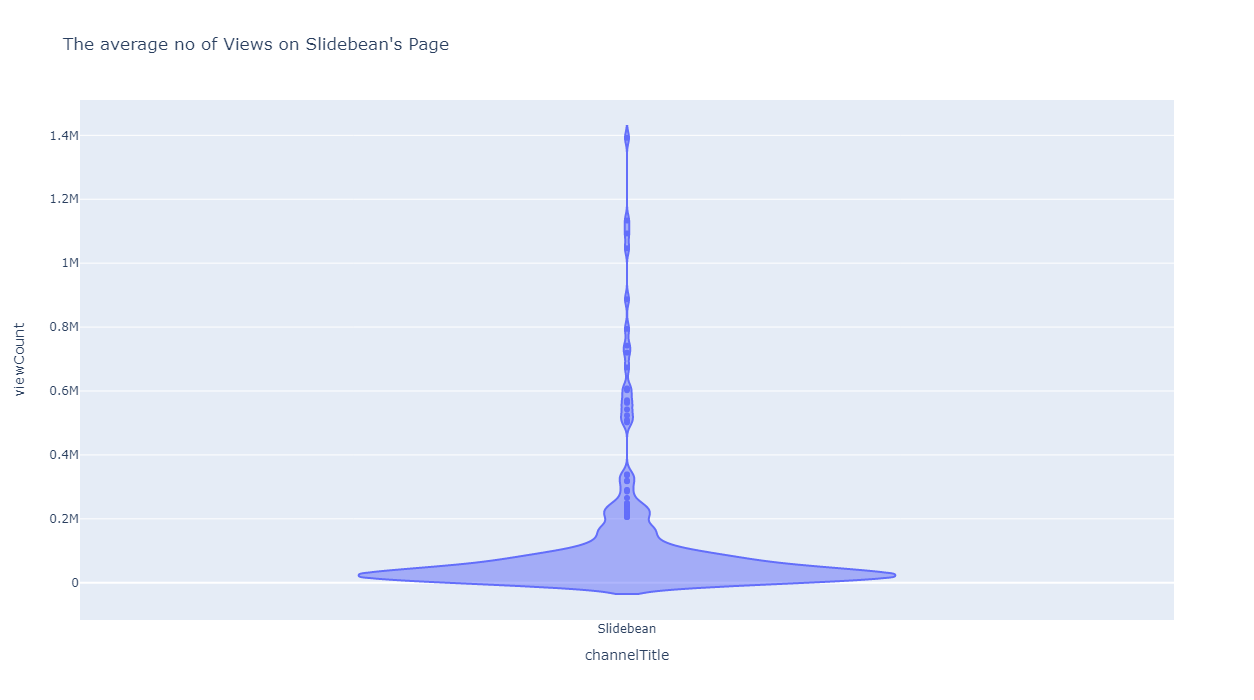

In [30]:
px.violin(video_df, x='channelTitle', y='viewCount', width=1000, height=700, title = "The average no of Views on Slidebean's Page")

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

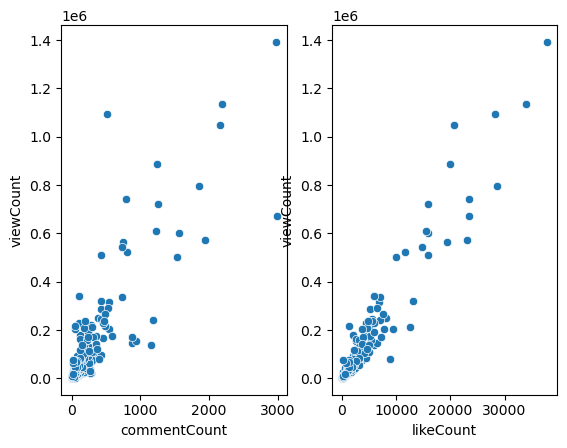

In [31]:
#Correlation
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax=ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax=ax[1])

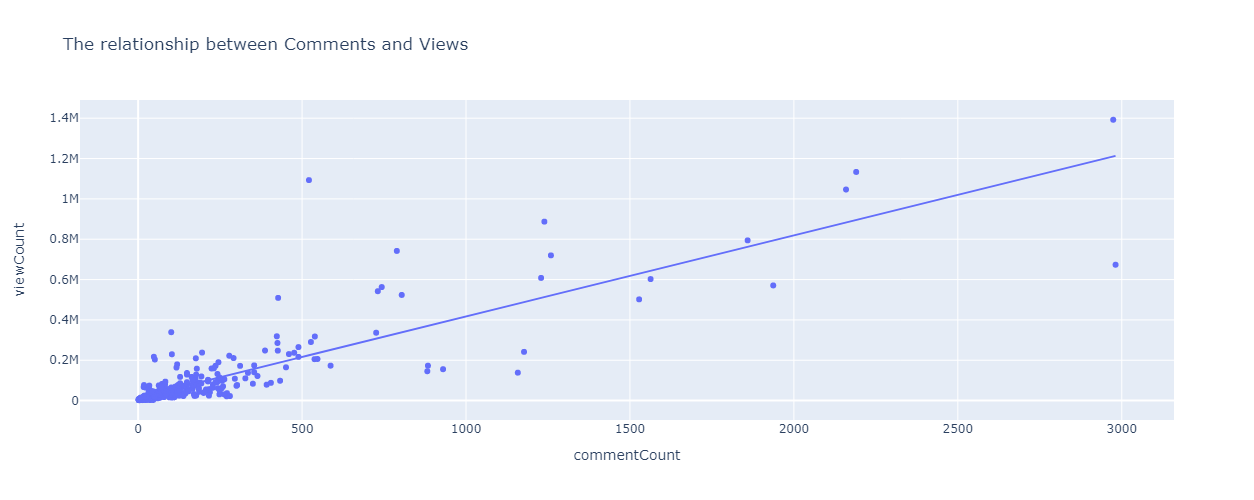

In [32]:
px.scatter(video_df, x = 'commentCount', y = 'viewCount', trendline='ols', width=700, height=500, title = 'The relationship between Comments and Views')

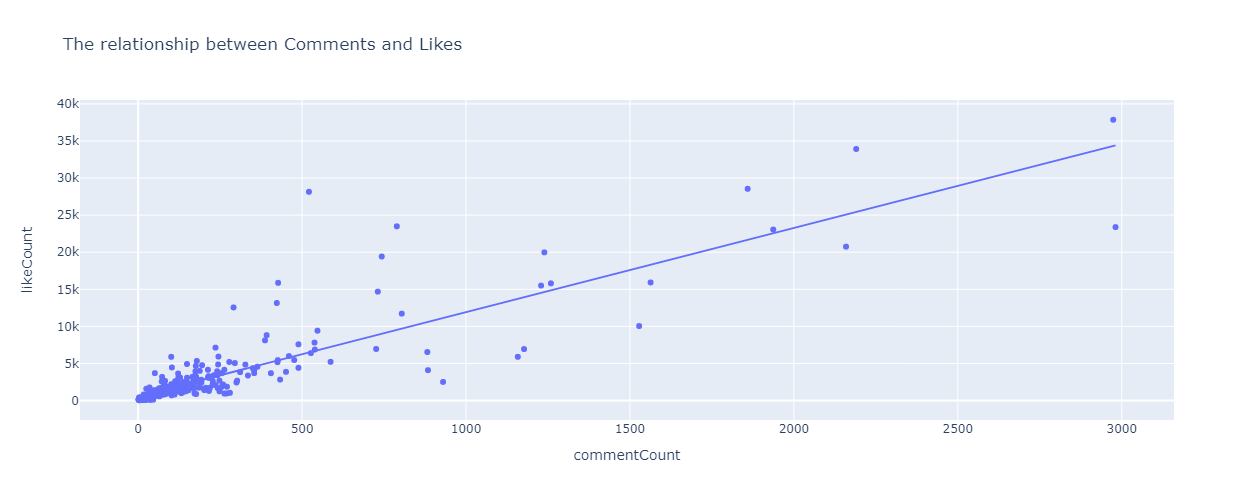

In [33]:
px.scatter(video_df, x = 'commentCount', y = 'likeCount', trendline='ols', width=700, height=500, title = 'The relationship between Comments and Likes')

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

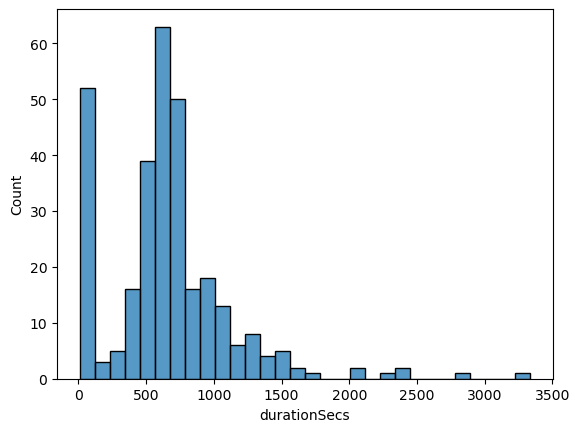

In [34]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

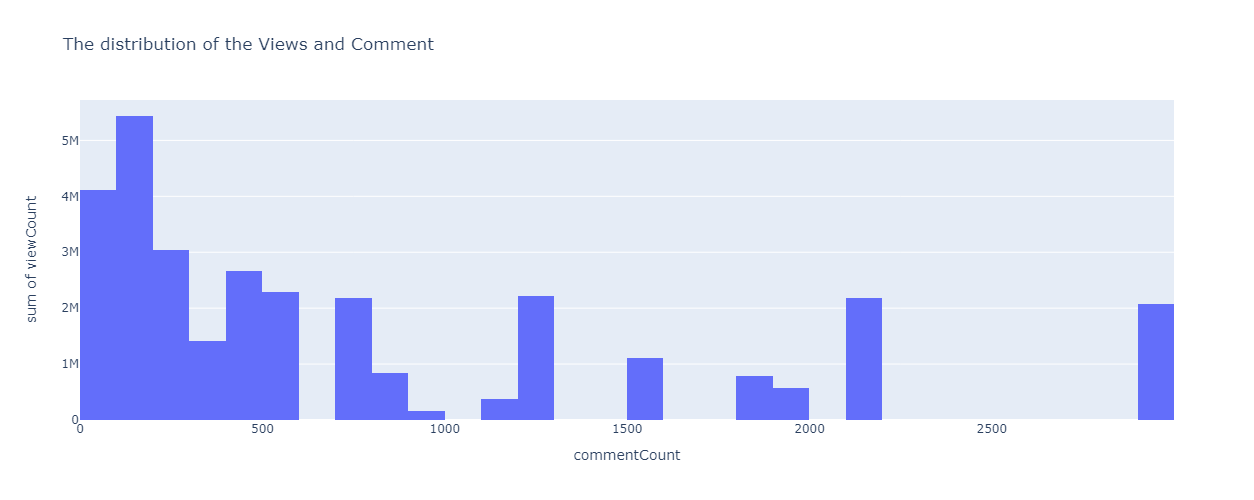

In [35]:
px.histogram(video_df, x = 'commentCount', y = 'viewCount', width=700, height=500, title='The distribution of the Views and Comment')

In [36]:
#NLP
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
from nltk.corpus import stopwords

import nltk

# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

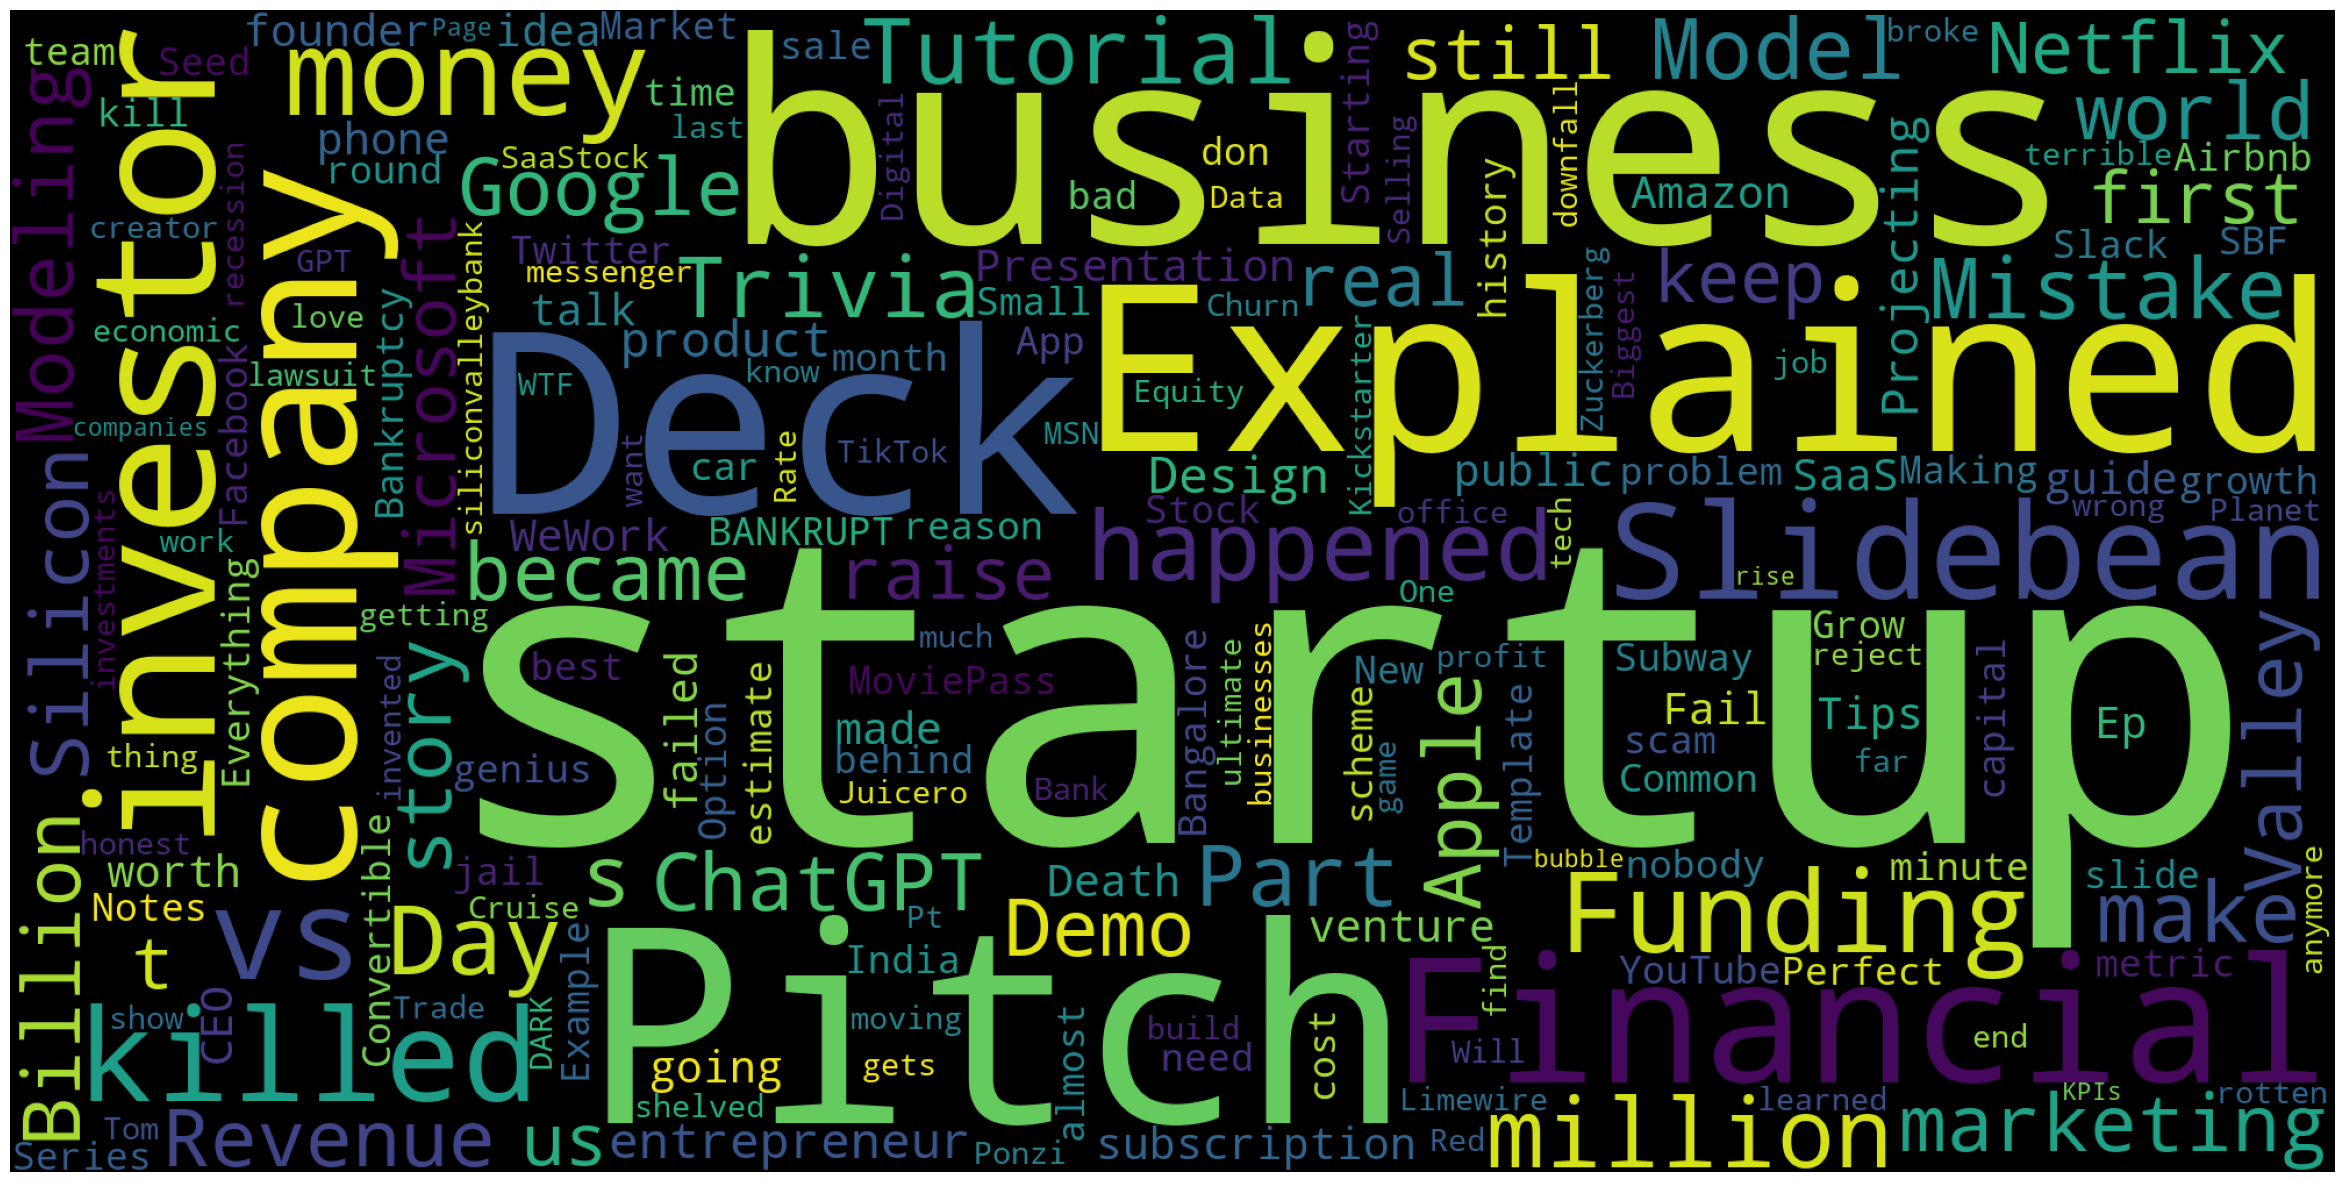

In [37]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis('off');
    
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)

plot_cloud(wordcloud)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5064\1838959399.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



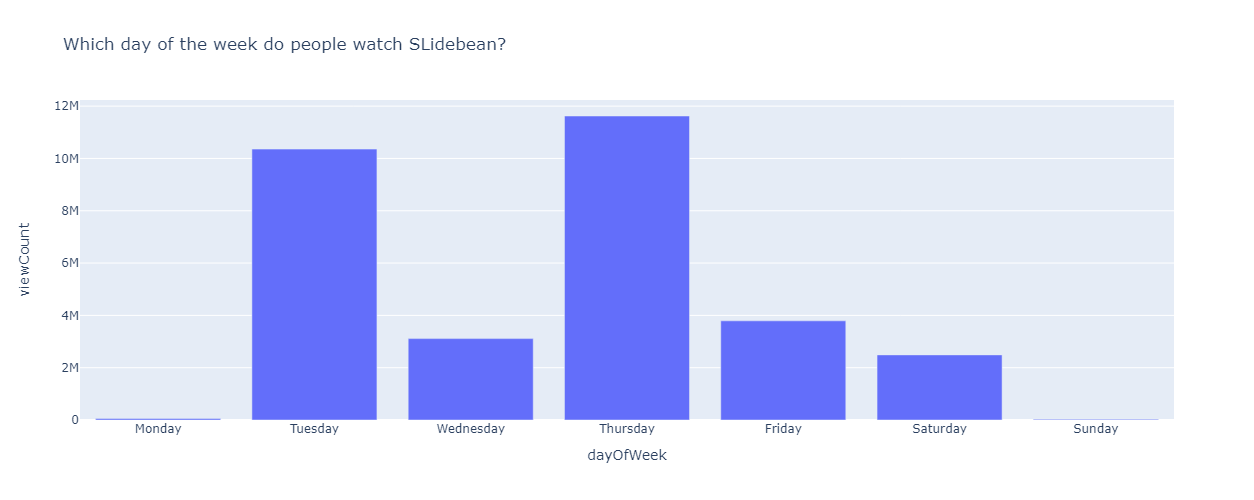

In [38]:
# Sort the DataFrame by 'dayOfWeek'
#video_df_sorted = video_df.sort_values('day_of_week', ascending=True)

# Create the bar chart
#day_df = px.bar(video_df_sorted, x='dayOfWeek',y='viewCount', height=500, width=700)

# Display the chart
#day_df.show()
video_df_subset = video_df.groupby(['dayOfWeek', 'day_of_week'])['viewCount', 'dayOfWeek'].sum().sort_values(by='day_of_week', ascending=True).reset_index()
video_df_subset

px.bar(video_df_subset, x='dayOfWeek', y='viewCount', height=500, width=700, title='Which day of the week do people watch SLidebean?')

<AxesSubplot:xlabel='dayOfWeek', ylabel='viewCount'>

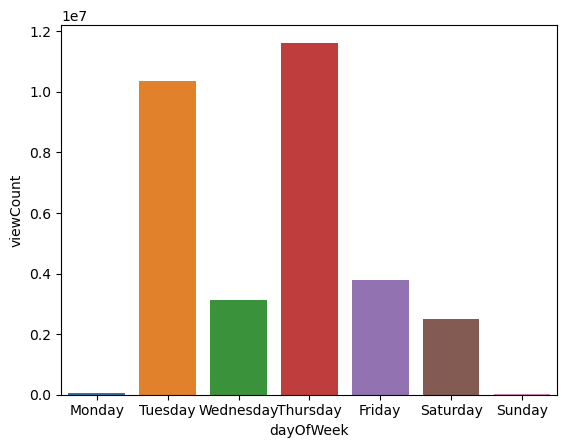

In [39]:
sns.barplot(x='dayOfWeek', y='viewCount', data=video_df_subset)